In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "/home/s2208943/ipdis/data/MSS3_Maria_analysis/WMH_inter_observer_voxelwise_analysis/Voxelwise_agreement.xlsx"

In [4]:
df = pd.read_excel(file_path)

In [5]:
df

Dataset ID  WMH1_mm3  WMH2_mm3  ICV_mm3        JI       DSC  \
0    MSS3_ED_001_V1      6825      6578  1886164  0.517206  0.681788   
1   MSS3_ED_001_V2a     11215     13999  1886164  0.758789  0.862854   
2   MSS3_ED_001_V2b     11452     13947  1886164  0.752018  0.858459   
3    MSS3_ED_001_V3     12023     14612  1886164  0.734049  0.846630   
4    MSS3_ED_002_V1     56156     56042  2393629  0.885681  0.939375   
..              ...       ...       ...      ...       ...       ...   
57   MSS3_ED_075_V1      6657      6738  1954902  0.062758  0.118104   
58   MSS3_ED_077_V1      2712      3266  2113593  0.827576  0.905654   
59   MSS3_ED_078_V1      8459     10288  1742275  0.031983  0.061983   
60   MSS3_ED_079_V1      6110      6956  1560672  0.030442  0.059085   
61   MSS3_ED_080_V1      7076      6751  1889192  0.878413  0.935272   

       TPF_1     TPF_2     TNF_1     TNF_2  
0   0.669451  0.694588  0.998931  0.998800  
1   0.969951  0.777056  0.998335  0.999820  
2   0.951973  0.781673  0.998376  0.999706  
3   0.937786  0.771626  0.998219  0.999600  
4   0.938422  0.940330  0.998569  0.998521  
..       ...       ...       ...       ...  
57  0.118822  0.117394  0.996948  0.996989  
58  0.998156  0.828843  0.999735  0.999998  
59  0.068684  0.056474  0.994401  0.995451  
60  0.063175  0.055492  0.995774  0.996316  
61  0.913793  0.957784  0.999849  0.999676  

[62 rows x 10 columns]

Text(0.5, 1.0, 'Rater 1 volume vs Rater 2 volume')

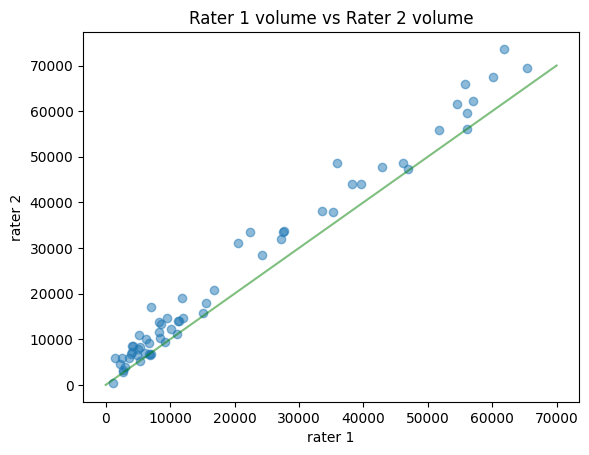

In [13]:
plt.plot([0, 70000], [0, 70000], c='green', alpha=0.5)
plt.scatter(df["WMH1_mm3"], df["WMH2_mm3"], alpha=0.5)
plt.xlabel("rater 1")
plt.ylabel("rater 2")
plt.title("Rater 1 volume vs Rater 2 volume")

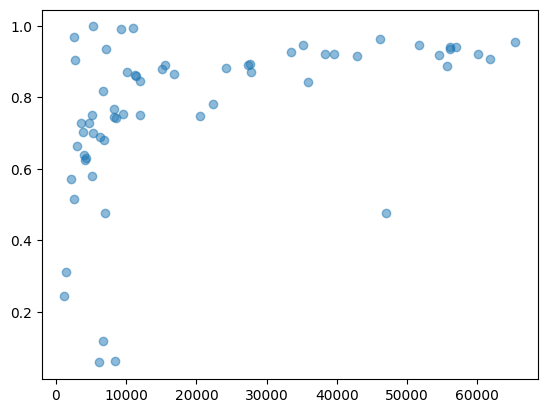

In [20]:
plt.scatter(df["WMH1_mm3"], df["DSC"], alpha=0.5)

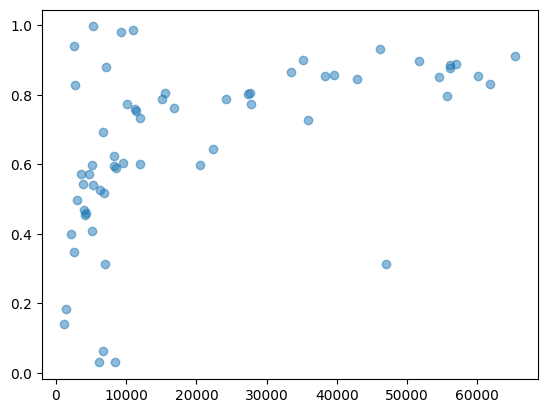

In [15]:
plt.scatter(df["WMH1_mm3"], df["JI"], alpha=0.5)

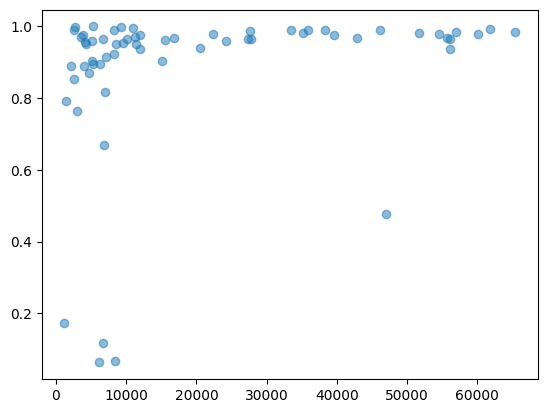

In [16]:
plt.scatter(df["WMH1_mm3"], df["TPF_1"], alpha=0.5)

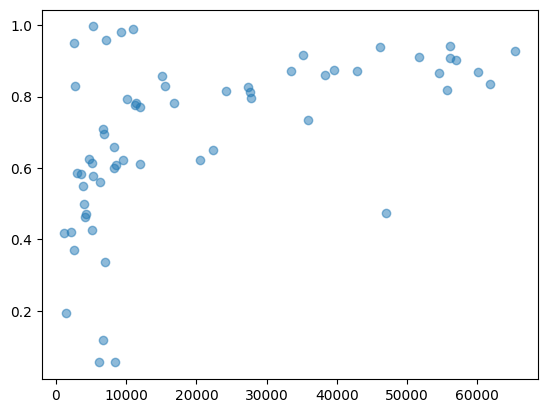

In [21]:
plt.scatter(df["WMH1_mm3"], df["TPF_2"], alpha=0.5)

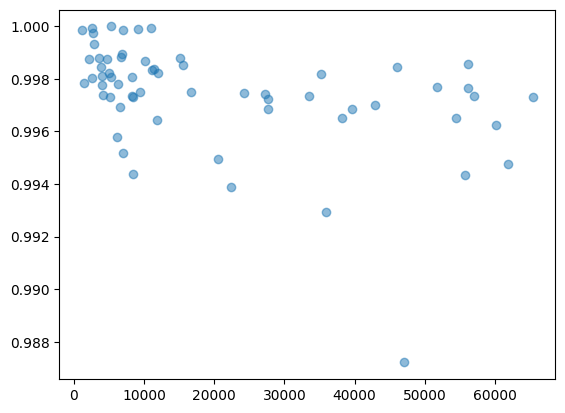

In [22]:
plt.scatter(df["WMH1_mm3"], df["TNF_1"], alpha=0.5)

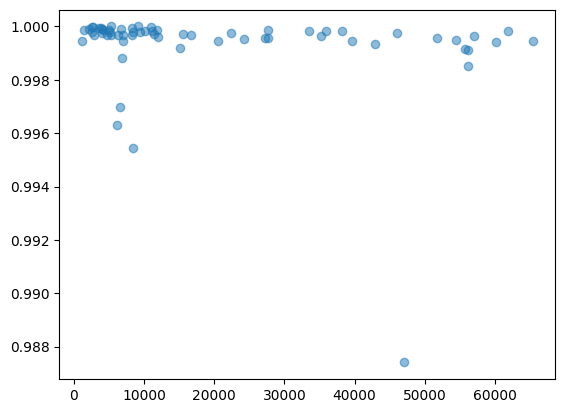

In [23]:
plt.scatter(df["WMH1_mm3"], df["TNF_2"], alpha=0.5)

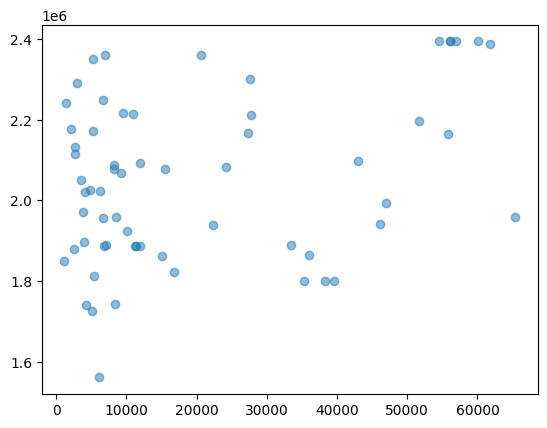

In [24]:
plt.scatter(df["WMH1_mm3"], df["ICV_mm3"], alpha=0.5)

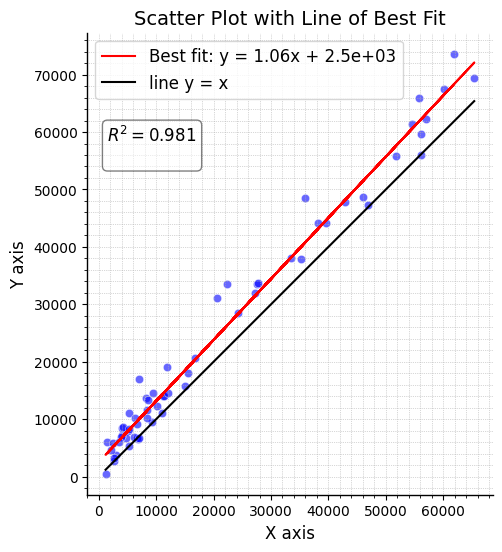

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example data
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]

# Calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)

# Plot line of best fit
plt.plot(x, line, color='red', label=f'Best fit: y = {slope:.2f}x + {intercept:.2}')
plt.plot([min(x), max(x)], [min(x), max(x)], color='black', label=f'line y = x')

# Annotate with text (R^2 and line equation)
plt.text(0.05, 0.80, f'$R^2 = {r_value**2:.3f}$\n', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Enhance aesthetics
plt.title('Scatter Plot with Line of Best Fit', fontsize=14)
plt.xlabel('X axis', fontsize=12)
plt.ylabel('Y axis', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.minorticks_on()


# Remove right and top spines
ax = plt.gca() # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make left and bottom spines thicker
ax.spines['left'].set_linewidth(1.)
ax.spines['bottom'].set_linewidth(1.)

ax.set_aspect('equal', adjustable='box')

# Show plot
plt.show()


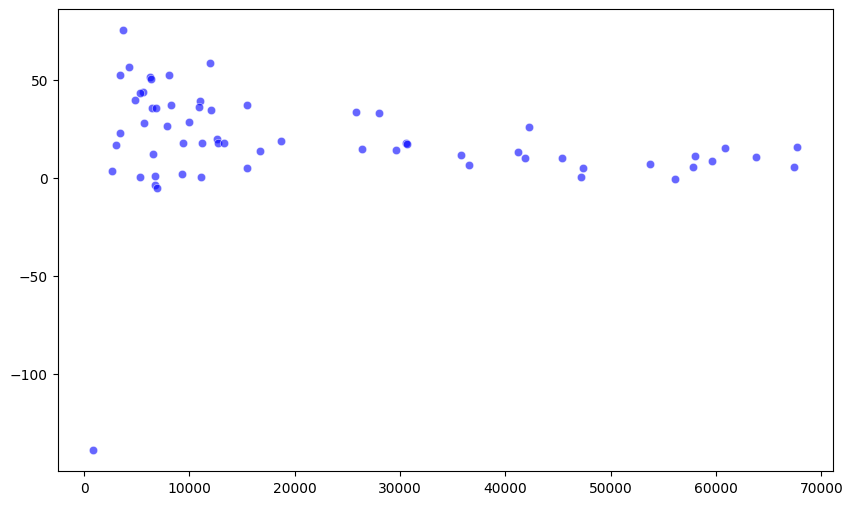

In [93]:
x = df["WMH1_mm3"]
y = df["WMH2_mm3"]
percent_diff = 100 * (y - x) / y
mean = (x + y) / 2

plt.figure(figsize=(10, 6))
plt.scatter(mean, percent_diff, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)